Import libraries needed for analysis

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Import the dataset

In [12]:
df = pd.read_csv('C:\\Users\\seven\\Downloads\\crime_data.csv')
df.head()

,Arrest Year,Arrest Date,Arrest Hour,Age,Defendant Race,Defendant Ethnicity,Defendant Sex,Arrest Category,Offense Latitude,Offense Longitude
0,2021,1/1/21,0,38,BLACK,UNKNOWN,MALE,Damage to Property,38.927,-77.006
1,2021,1/1/21,0,31,BLACK,NOT HISPANIC,MALE,Simple Assault,38.925,-77.033
2,2021,1/1/21,0,35,BLACK,NOT HISPANIC,MALE,Weapon Violations,38.900,-76.930
3,2021,1/1/21,0,31,BLACK,NOT HISPANIC,MALE,Weapon Violations,38.849,-76.976
4,2021,1/1/21,0,21,BLACK,NOT HISPANIC,MALE,Weapon Violations,38.882,-76.925


In [20]:
df.shape

(15653, 10)

In [22]:
df.columns

Index(['Arrest Year', 'Arrest Date', 'Arrest Hour', 'Age', 'Defendant Race',
       'Defendant Ethnicity', 'Defendant Sex', 'Arrest Category',
       'Offense Latitude', 'Offense Longitude'],
      dtype='object')

Check for missing/null values

In [25]:
df.isnull()

,Arrest Year,Arrest Date,Arrest Hour,Age,Defendant Race,Defendant Ethnicity,Defendant Sex,Arrest Category,Offense Latitude,Offense Longitude
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
15648,False,False,False,False,False,False,False,False,False,False
15649,False,False,False,False,False,False,False,False,False,False
15650,False,False,False,False,False,False,False,False,False,False
15651,False,False,False,False,False,False,False,False,False,False


In [29]:
columns = ['Arrest Year', 'Arrest Date', 'Arrest Hour', 'Age', 'Defendant Race',
       'Defendant Ethnicity', 'Defendant Sex', 'Arrest Category',
       'Offense Latitude', 'Offense Longitude']
for columns in columns:
    null_check = pd.isnull(df[columns])
    print(df[null_check])

Empty DataFrame
Columns: [Arrest Year, Arrest Date, Arrest Hour, Age, Defendant Race, Defendant Ethnicity, Defendant Sex, Arrest Category, Offense Latitude, Offense Longitude]
Index: []
Empty DataFrame
Columns: [Arrest Year, Arrest Date, Arrest Hour, Age, Defendant Race, Defendant Ethnicity, Defendant Sex, Arrest Category, Offense Latitude, Offense Longitude]
Index: []
Empty DataFrame
Columns: [Arrest Year, Arrest Date, Arrest Hour, Age, Defendant Race, Defendant Ethnicity, Defendant Sex, Arrest Category, Offense Latitude, Offense Longitude]
Index: []
Empty DataFrame
Columns: [Arrest Year, Arrest Date, Arrest Hour, Age, Defendant Race, Defendant Ethnicity, Defendant Sex, Arrest Category, Offense Latitude, Offense Longitude]
Index: []
Empty DataFrame
Columns: [Arrest Year, Arrest Date, Arrest Hour, Age, Defendant Race, Defendant Ethnicity, Defendant Sex, Arrest Category, Offense Latitude, Offense Longitude]
Index: []
Empty DataFrame
Columns: [Arrest Year, Arrest Date, Arrest Hour, Age, 

In [31]:
df = df.dropna()
df.shape

(15632, 10)

Arrest Pattern

a. Categorical Classification

In [37]:
df['Arrest Category'].unique()

array(['Damage to Property', 'Simple Assault', 'Weapon Violations',
       'Narcotics', 'Other Crimes', 'Driving/Boating While Intoxicated',
       'Traffic Violations', 'Sex Offenses', 'Theft', 'Property Crimes',
       'Release Violations/Fugitive (Warr)',
       'Release Violations/Fugitive (Fug)',
       'Offenses Against Family & Children', 'Liquor Law Violations',
       'Assault with a Dangerous Weapon', 'Homicide',
       'Assault on a Police Officer', 'Burglary', 'Vending Violations',
       'Robbery', 'Motor Vehicle Theft', 'Sex Abuse',
       'Aggravated Assault', 'Disorderly Conduct', 'Gambling',
       'Kidnapping', 'Fraud and Financial Crimes',
       'Fraud and Financial Crimes (Frau)', 'Theft from Auto',
       'Prostitution', 'Fraud and Financial Crimes (Forg)',
       'Fraud and Financial Crimes (Coun)'], dtype=object)

In [41]:
df_sex = df.groupby('Defendant Sex').size().reset_index(name = 'Numbers')
df_sex

,Defendant Sex,Numbers
0,FEMALE,3419
1,MALE,12207
2,UNKNOWN,6


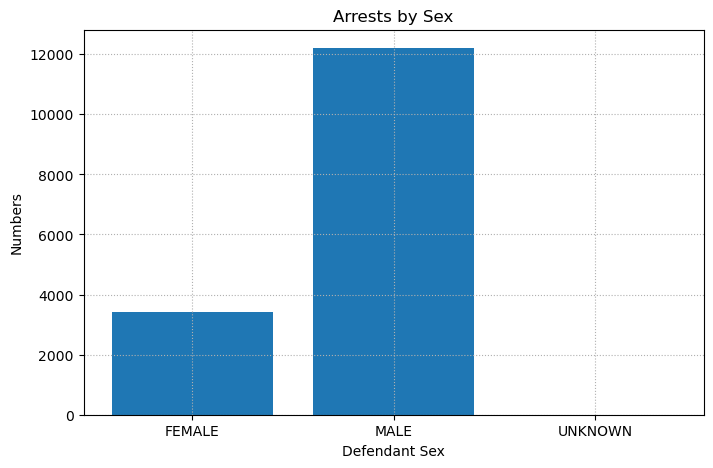

In [53]:
plt.figure(figsize = (8,5))
plt.xlabel('Defendant Sex')
plt.title('Arrests by Sex')
plt.ylabel('Numbers')
x = df_sex['Defendant Sex']
y = df_sex['Numbers']
plt.bar(x,y)
plt.grid(which = 'both', linestyle = ':')
plt.savefig('defendant_sex.jpg', dpi = 480)

b. Continuous Data Classification

In [56]:
df_age = df.groupby('Age').size().reset_index(name = 'Numbers')
df_age

,Age,Numbers
0,18,275
1,19,311
2,20,390
3,21,483
4,22,447
...,...,...
64,83,1
65,85,1
66,88,1
67,120,4


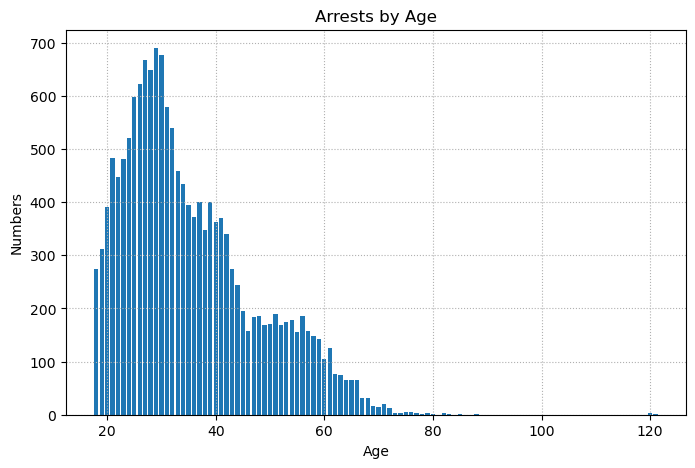

In [58]:
plt.figure(figsize = (8,5))
plt.xlabel('Age')
plt.title('Arrests by Age')
plt.ylabel('Numbers')
x = df_age['Age']
y = df_age['Numbers']
plt.bar(x,y)
plt.grid(which = 'both', linestyle = ':')
plt.savefig('defendant_age.jpg', dpi = 480)

C:\Users\seven\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


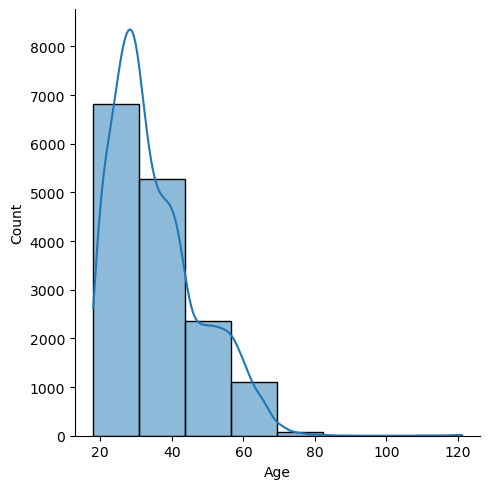

In [60]:
sns.displot(df['Age'], kde = True, bins = 8)

In [62]:
df_min = df['Age'].min()
df_max = df['Age'].max()
print(df_min, df_max)

18 121


Age 120 and 121 ???- Most likely erroneous data entry.

<Axes: >

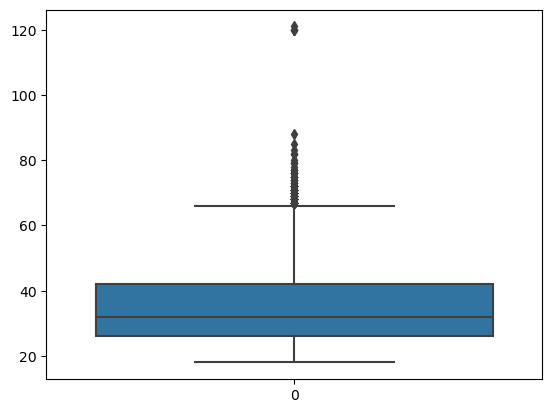

In [65]:
sns.boxplot(df['Age'])

Calculate the upper and lower limits

In [80]:
q_1 = df['Age'].quantile(0.25)
q_3 = df['Age'].quantile(0.75)
iqr = q_3 - q_1
lower = q_1 - 1.5 * iqr
upper = q_3 + 1.5 * iqr

Create boolean values to show outliers

In [83]:
upper_array = np.where(df['Age'] >= upper) [0]
lower_array = np.where(df['Age'] <= lower) [0]

Remove outliers

In [86]:
df.drop(index = upper_array, inplace = True)
df.drop(index = lower_array, inplace = True)

In [88]:
df.shape

(15401, 10)